In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Predict Admission.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.shape

(400, 9)

In [10]:
corrmat = data.corr()
corrmat

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


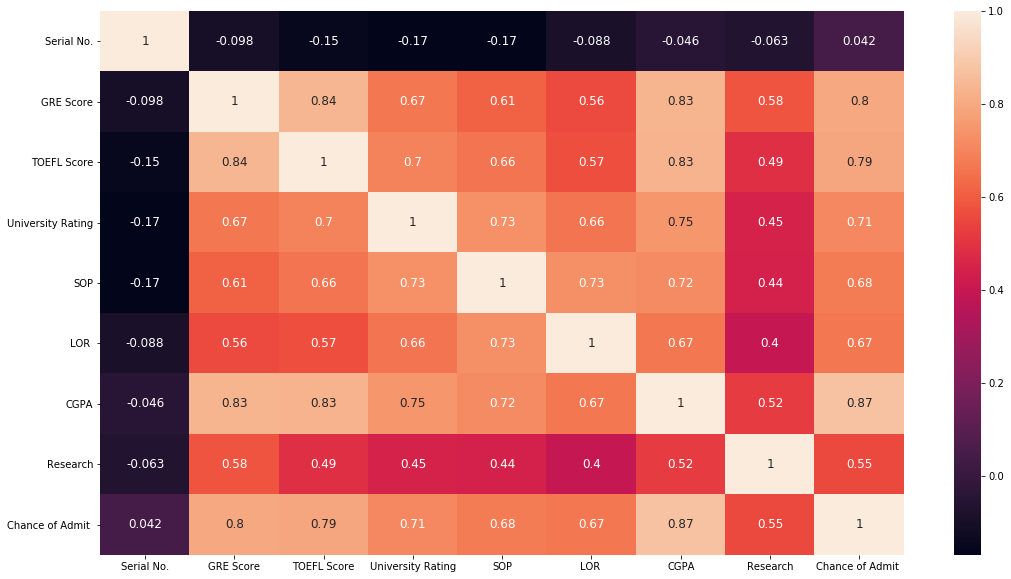

In [11]:
fig, ax=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':12})

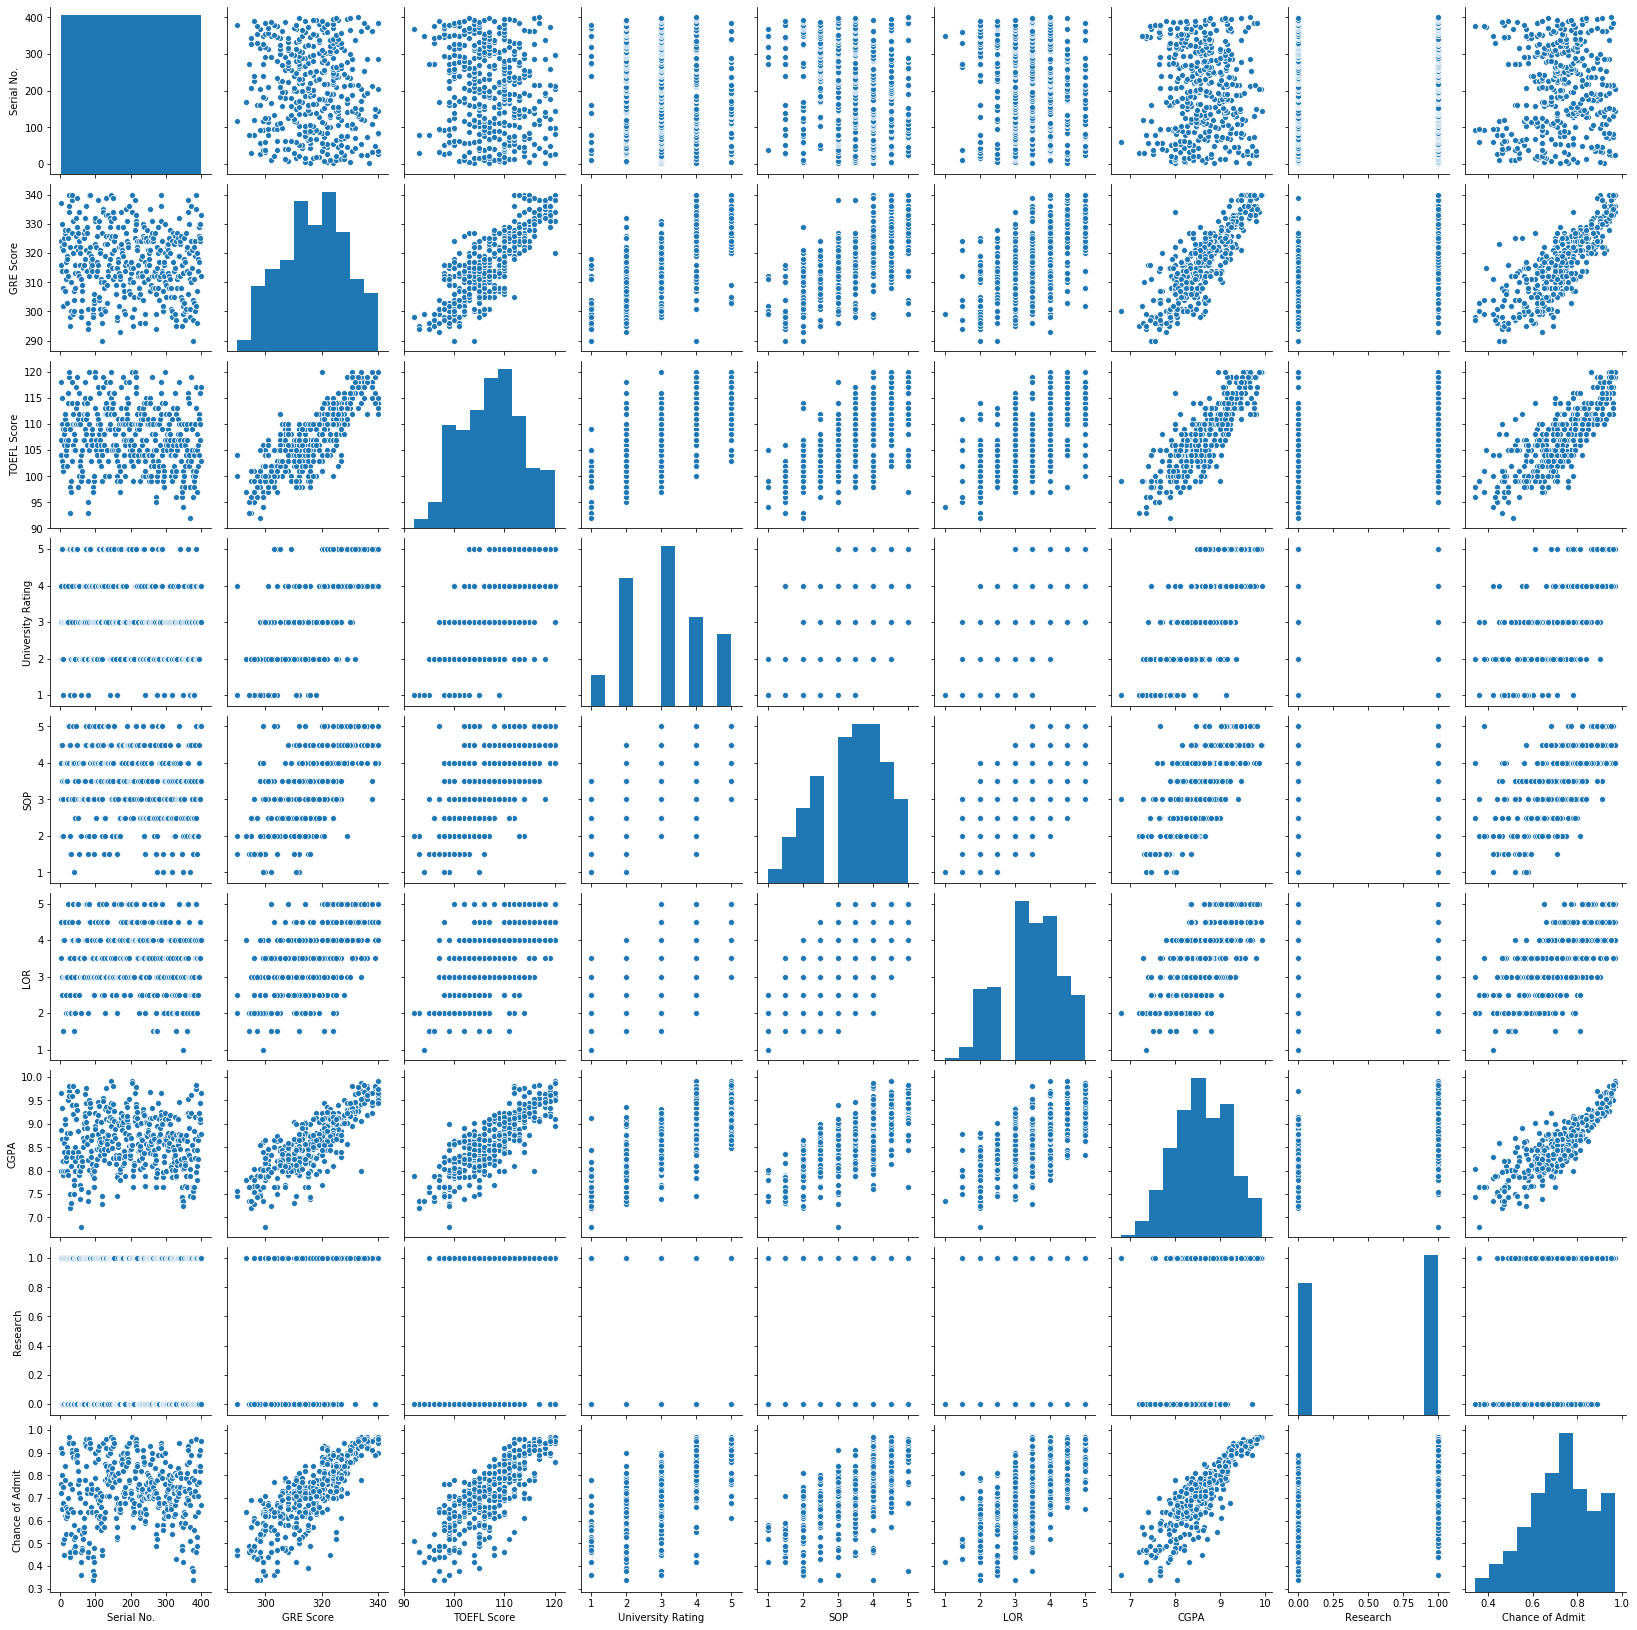

In [12]:
sns.pairplot(data)

In [13]:
#using threshold value
def getCorrelatedFeature(corrdata,thresold):
    feature=[]
    values=[]
    for i,index in enumerate(corrdata.index):
        if(abs(corrdata[index])>thresold):
            feature.append(index)
            values.append(corrdata[index])
    df=pd.DataFrame(data=values,index=feature,columns=['corr value'])
    return df

In [14]:
corrmat.index.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [15]:
thresold = 0.70
corr_value=getCorrelatedFeature(corrmat['Chance of Admit '],thresold)
corr_value

,corr value
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
CGPA,0.873289
Chance of Admit,1.000000


In [16]:
correlated_data=data[corr_value.index]
correlated_data.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
0,337,118,4,9.65,0.92
1,324,107,4,8.87,0.76
2,316,104,3,8.00,0.72
3,322,110,3,8.67,0.80
4,314,103,2,8.21,0.65


In [17]:
X=correlated_data.drop("Chance of Admit ",axis=1)
y=correlated_data['Chance of Admit ']
feature_names=list(X.columns.values)
X.head()

,GRE Score,TOEFL Score,University Rating,CGPA
0,337,118,4,9.65
1,324,107,4,8.87
2,316,104,3,8.00
3,322,110,3,8.67
4,314,103,2,8.21


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)
X_train.shape , X_test.shape

((340, 4), (60, 4))

In [19]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,CGPA
74,314,106,3,8.90
272,294,95,1,7.64
4,314,103,2,8.21
354,297,98,2,7.67
191,323,110,5,8.98


In [20]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([0.71969974, 0.71865259, 0.77319161, 0.63307901, 0.73473852,
       0.610193  , 0.72632789, 0.63649274, 0.87082425, 0.90027189,
       0.54294946, 0.89217521, 0.71811046, 0.46315451, 0.84054473,
       0.64940765, 0.61218396, 0.82055273, 0.59536673, 0.72529169,
       0.8637142 , 0.84518215, 0.67614663, 0.46494368, 0.78738566,
       0.59458897, 0.49265863, 0.67168288, 0.89663373, 0.65388571,
       0.6115322 , 0.7318743 , 0.73020208, 0.56587476, 0.808644  ,
       0.77392672, 0.61958312, 0.84713236, 0.64444792, 0.93771523,
       0.71719668, 0.65837258, 0.68318448, 0.79040422, 0.82300768,
       0.66056049, 0.57375941, 0.68510275, 0.61869367, 0.59342154,
       0.67367193, 0.78834019, 0.65945857, 0.87357573, 0.70450643,
       0.77528355, 0.71469928, 0.7149542 , 0.79230677, 0.83453808])

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("r2_score is ",score)
print("mean absolute error is ",mae)
print("mean squared error is ",mse)

r2_score is  0.671631910213236
mean absolute error is  0.053106180449061006
mean squared error is  0.005778503066701718


# Recursive feature elimination

In [25]:
from sklearn.feature_selection import RFE

In [47]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [48]:
X = data.drop(labels = ["Chance of Admit ","Serial No."],axis = 1)
y=correlated_data['Chance of Admit ']
feature_names=list(X.columns.values)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [49]:
model = LinearRegression()
rfe = RFE(model,4,verbose = 1)
rfe = rfe.fit(X,y)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


In [50]:
rfe.support_

array([False, False,  True, False,  True,  True,  True])

In [51]:
XX = X[X.columns[rfe.support_]]
XX.head()

,University Rating,LOR,CGPA,Research
0,4,4.5,9.65,1
1,4,4.5,8.87,1
2,3,3.5,8.00,1
3,3,2.5,8.67,1
4,2,3.0,8.21,0


In [52]:
XX.shape

(400, 4)

In [53]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.15, random_state = 0)

In [55]:
X_train.shape , X_test.shape

((340, 4), (60, 4))

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [57]:
y_predict

array([0.71839069, 0.7067279 , 0.76541832, 0.62287405, 0.7261824 ,
       0.60488901, 0.71144189, 0.62965605, 0.85358246, 0.90801134,
       0.52939738, 0.87872516, 0.68835318, 0.43940212, 0.84745506,
       0.62122376, 0.64229382, 0.81102523, 0.57052719, 0.73602809,
       0.85727272, 0.82786848, 0.68545629, 0.46414112, 0.79342987,
       0.60508385, 0.53119376, 0.63943167, 0.86399866, 0.63762858,
       0.63759384, 0.73105649, 0.76562717, 0.58523967, 0.76728418,
       0.75067781, 0.62615391, 0.86872667, 0.64271824, 0.93089119,
       0.71632999, 0.64909653, 0.68198218, 0.80982068, 0.80475175,
       0.60673415, 0.52306113, 0.69367972, 0.60323872, 0.60817558,
       0.67526296, 0.78813136, 0.6588234 , 0.85255873, 0.75397839,
       0.74737722, 0.64287833, 0.71470773, 0.75766135, 0.84927216])

In [58]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("r2_score is ",score)
print("mean absolute error is ",mae)
print("mean squared error is ",mse)

r2_score is  0.6805756873013344
mean absolute error is  0.05576557729498797
mean squared error is  0.0056211137072026416


# using all features

In [40]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)
X_train.shape

(340, 7)

In [60]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([0.6982822 , 0.69379466, 0.78022946, 0.6160176 , 0.72278934,
       0.60357201, 0.70687459, 0.64307345, 0.87062237, 0.91924038,
       0.53957076, 0.88652016, 0.70984872, 0.46043603, 0.85547062,
       0.62397875, 0.6300801 , 0.81382897, 0.58702724, 0.73195383,
       0.87708736, 0.84461591, 0.65920149, 0.45888952, 0.78438889,
       0.5831941 , 0.49958161, 0.64295835, 0.89032243, 0.65096347,
       0.64186061, 0.74208111, 0.74255172, 0.55618244, 0.78459551,
       0.77358521, 0.65446044, 0.8621754 , 0.63069617, 0.92885843,
       0.72904521, 0.67333955, 0.71277164, 0.80853614, 0.82506493,
       0.65860787, 0.56729389, 0.69337719, 0.60849995, 0.60198147,
       0.67510602, 0.80178141, 0.65249288, 0.88243013, 0.72180505,
       0.75567153, 0.71279217, 0.7369817 , 0.75934452, 0.82950355])

In [61]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("r2_score is ",score)
print("mean absolute error is ",mae)
print("mean squared error is ",mse)

r2_score is  0.6945828973147207
mean absolute error is  0.051378385157414094
mean squared error is  0.005374619883546243
